Dataset: Tiny ImageNet https://www.kaggle.com/datasets/akash2sharma/tiny-imagenet/data

Initial model: https://www.kaggle.com/code/ivankunyankin/googlenet-inception-from-scratch-using-pytorch by Ivan Kunyankin

#Download data

!wget link is available until 2nd of April: expiry date of the link should be extended or replaced

In [ ]:
!pip install torch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 754.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!wget oshi.at/wLHF

--2024-03-31 23:28:15--  http://oshi.at/wLHF
Resolving oshi.at (oshi.at)... 194.15.112.248, 188.241.120.6, 5.253.86.15
Connecting to oshi.at (oshi.at)|194.15.112.248|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://oshi.at/wLHF [following]
--2024-03-31 23:28:15--  https://oshi.at/wLHF
Connecting to oshi.at (oshi.at)|194.15.112.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497536564 (474M) [application/zip]
Saving to: ‘wLHF’

wLHF                100%[===================>] 474.49M  2.04MB/s    in 2m 49s  

2024-03-31 23:31:05 (2.80 MB/s) - ‘wLHF’ saved [497536564/497536564]



In [ ]:
!ls

sample_data  wLHF


In [ ]:
!unzip wLHF

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: tiny-imagenet-200/val/images/val_5500.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5501.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5502.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5503.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5504.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5505.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5506.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5507.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5508.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5509.JPEG  
  inflating: tiny-imagenet-200/val/images/val_551.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5510.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5511.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5512.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5513.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5514.JPEG  
  inf

In [ ]:
!ls

sample_data  tiny-imagenet-200	wLHF


In [ ]:
!rm -R wLHF

In [ ]:
!ls tiny-imagenet-200/tiny-imagenet-200/

test  train  val  wnids.txt  words.txt


In [ ]:
!pwd

/content


In [ ]:
import torch_optimizer as optim

It is better to choose model for binary classification of a similar dataset but yet it is hard to do this, so optimizers are chosen based on TinyImageNet as long as there are no better options.


Following are the model suggested in https://www.kaggle.com/code/ivankunyankin/googlenet-inception-from-scratch-using-pytorch

In [ ]:
import time
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim_based
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

torch.manual_seed(17)

# Data preparation

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
dataset = torchvision.datasets.ImageFolder('./tiny-imagenet-200/tiny-imagenet-200/train', transform=transform)

In [ ]:
# #split the data
train_data, val_data, test_data = torch.utils.data.random_split(dataset, [80000, 10000, 10000])

In [ ]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


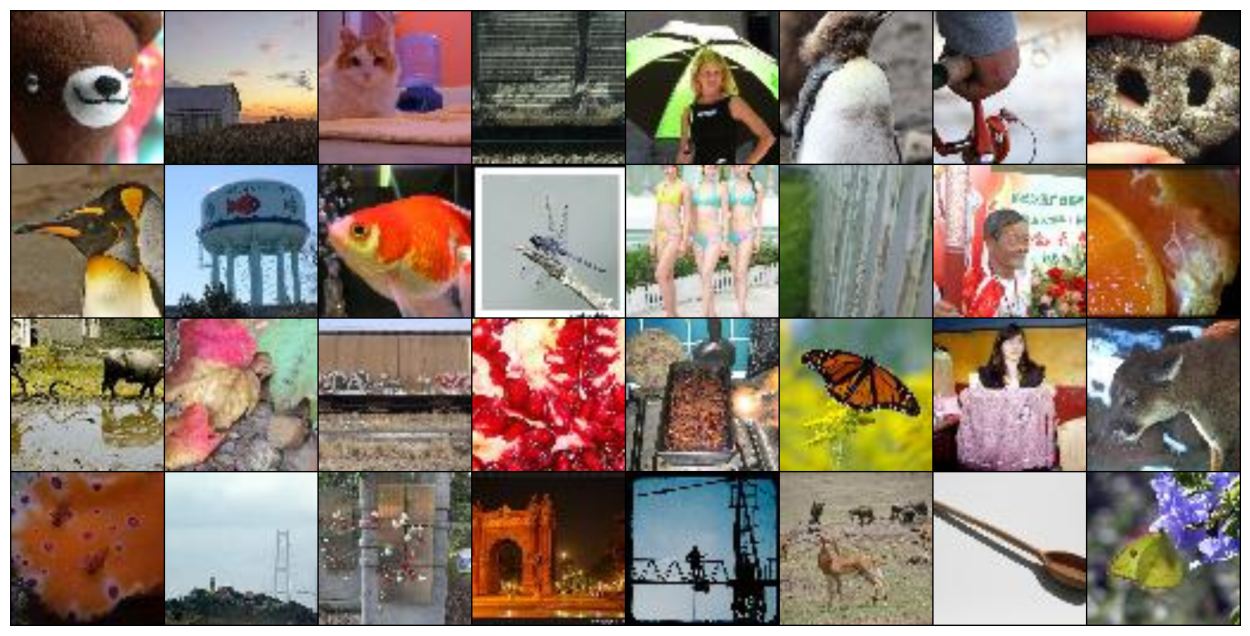

In [ ]:
from torchvision.utils import make_grid

for images, _ in train_loader:
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=8).permute((1, 2, 0)))
    break

# Model

In [ ]:
class Inception(nn.Module):

    def __init__(self, in_channels=3, use_auxiliary=True, num_classes=1000):
        super(Inception, self).__init__()

        self.conv1 = ConvBlock(in_channels, 64, kernel_size=7, stride=2, padding=3)
        self.conv2 = ConvBlock(64, 192, kernel_size=3, stride=1, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)

        self.dropout = nn.Dropout(0.4)
        self.linear = nn.Linear(1024, num_classes)

        self.use_auxiliary = use_auxiliary
        if use_auxiliary:
            self.auxiliary4a = Auxiliary(512, num_classes)
            self.auxiliary4d = Auxiliary(528, num_classes)

        self.inception3a = InceptionBlock(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = InceptionBlock(256, 128, 128, 192, 32, 96, 64)
        self.inception4a = InceptionBlock(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = InceptionBlock(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = InceptionBlock(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = InceptionBlock(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = InceptionBlock(528, 256, 160, 320, 32, 128, 128)
        self.inception5a = InceptionBlock(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = InceptionBlock(832, 384, 192, 384, 48, 128, 128)

    def forward(self, x):
        y = None
        z = None

        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.maxpool(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool(x)

        x = self.inception4a(x)
        if self.training and self.use_auxiliary:
            y = self.auxiliary4a(x)

        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        if self.training and self.use_auxiliary:
            z = self.auxiliary4d(x)

        x = self.inception4e(x)
        x = self.maxpool(x)

        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.dropout(x)
        x = self.linear(x)

        return x, y, z

In [ ]:
class ConvBlock(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, **kwargs):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.bn(self.conv(x)))

In [ ]:
class InceptionBlock(nn.Module):

    def __init__(self, im_channels, num_1x1, num_3x3_red, num_3x3, num_5x5_red, num_5x5, num_pool_proj):
        super(InceptionBlock, self).__init__()

        self.one_by_one = ConvBlock(im_channels, num_1x1, kernel_size=1)

        self.tree_by_three_red = ConvBlock(im_channels, num_3x3_red, kernel_size=1)
        self.tree_by_three = ConvBlock(num_3x3_red, num_3x3, kernel_size=3, padding=1)

        self.five_by_five_red = ConvBlock(im_channels, num_5x5_red, kernel_size=1)
        self.five_by_five = ConvBlock(num_5x5_red, num_5x5, kernel_size=5, padding=2)

        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.pool_proj = ConvBlock(im_channels, num_pool_proj, kernel_size=1)

    def forward(self, x):
        x1 = self.one_by_one(x)

        x2 = self.tree_by_three_red(x)
        x2 = self.tree_by_three(x2)

        x3 = self.five_by_five_red(x)
        x3 = self.five_by_five(x3)

        x4 = self.maxpool(x)
        x4 = self.pool_proj(x4)

        x = torch.cat([x1, x2, x3, x4], 1)
        return x

In [ ]:
class Auxiliary(nn.Module):

    def __init__(self, in_channels, num_classes):
        super(Auxiliary, self).__init__()
        self.avgpool = nn.AvgPool2d(kernel_size=5, stride=3)
        self.conv1x1 = ConvBlock(in_channels, 128, kernel_size=1)

        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

        self.dropout = nn.Dropout(0.7)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.avgpool(x)
        x = self.conv1x1(x)
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
model = Inception()
#define the device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
#move the model to the device
model.to(device)
next(model.parameters()).is_cuda

True

#Switching optimizer

In [ ]:
# # ADAM
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
# #YOGI
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Yogi(
#     model.parameters(),
#     lr= 1e-2,
#     betas=(0.9, 0.999),
#     eps=1e-3,
#     initial_accumulator=1e-6,
#     weight_decay=0,
# )
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
# #LOOKAHEAD
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# yogi = optim.Yogi(
#     model.parameters(),
#     lr= 1e-2,
#     betas=(0.9, 0.999),
#     eps=1e-3,
#     initial_accumulator=1e-6,
#     weight_decay=0,
# )

# optimizer = optim.Lookahead(yogi, k=5, alpha=0.5)
# optimizer.step()

In [ ]:
#QHAdam
# epochs = 18 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.QHAdam(
#     model.parameters(),
#     lr= 1e-3,
#     betas=(0.9, 0.999),
#     nus=(1.0, 1.0),
#     weight_decay=0,
#     decouple_weight_decay=False,
#     eps=1e-8,
# )
# optimizer.step()

In [ ]:
# #SGD
# epochs = 18 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.SGD(model.parameters(), lr=0.01, weight_decay=0.001)
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
# #AccSGD очень чувствителен к локальным минимумам
# epochs = 18 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.AccSGD(
#     model.parameters(),
#     lr=1e-3,
#     kappa=1000.0,
#     xi=10.0,
#     small_const=0.7,
#     weight_decay=0
# )
# optimizer.step()

In [ ]:
# #Swats
# epochs = 16 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SWATS(
#     model.parameters(),
#     lr=1e-1,
#     betas=(0.9, 0.999),
#     eps=1e-3,
#     weight_decay= 0.0,
#     amsgrad=False,
#     nesterov=False,
# )
# optimizer.step()

In [ ]:
# #Ranger
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Ranger(
#     model.parameters(),
#     lr=1e-3,
#     alpha=0.5,
#     k=6,
#     N_sma_threshhold=5,
#     betas=(.95, 0.999),
#     eps=1e-5,
#     weight_decay=0
# )
# optimizer.step()

In [ ]:
# #diffGrad ДА❗️❗️❗️
# epochs = 4 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.DiffGrad(
#     model.parameters(),
#     lr= 1e-3,
#     betas=(0.9, 0.999),
#     eps=1e-8,
#     weight_decay=0,
# )
# optimizer.step()

In [ ]:
# #SWATS with normal lr ??????
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SWATS(
#     model.parameters(),
#     lr=1e-3,
#     betas=(0.9, 0.999),
#     eps=1e-9,
#     weight_decay= 0.0,
#     amsgrad=False,
#     nesterov=False,
# )
# optimizer.step()

In [ ]:
# #AdamW lr=1e-3 weight decay = 1e-2
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.AdamW(
#     model.parameters(),
#     lr=1e-3,
#     betas=(0.9, 0.999),
#     eps=1e-08,
#     weight_decay=0.01,
#     amsgrad=False,
#     maximize=False,
#     foreach=None,
#     capturable=False,
#     differentiable=False,
#     fused=None)
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
# #AdamW lr=1e-3 weight decay = 1e-3 NOT TESTED YET
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.AdamW(
#     model.parameters(),
#     lr=1e-3,
#     betas=(0.9, 0.999),
#     eps=1e-08,
#     weight_decay=1e-3,
#     amsgrad=False,
#     maximize=False,
#     foreach=None,
#     capturable=False,
#     differentiable=False,
#     fused=None)
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
# #AdamW lr=1e-4 weight decay = 1e-3 ДА❗️❗️❗️
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.AdamW(
#     model.parameters(),
#     lr=1e-4,
#     betas=(0.9, 0.999),
#     eps=1e-08,
#     weight_decay=1e-3,
#     amsgrad=False,
#     maximize=False,
#     foreach=None,
#     capturable=False,
#     differentiable=False,
#     fused=None)
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
# #Lamb NOT TESTED YET приближён в Адаму, но для батчей
# epochs = 14 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Lamb(
#     model.parameters(),
#     lr= 1e-4,
#     betas=(0.9, 0.999),
#     eps=1e-8,
#     weight_decay=0,
# )

In [ ]:
# #SGD lr=1e-3 ; 1e-4 ужасно
# epochs = 16 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.SGD(model.parameters(), lr=1e-2, weight_decay=1e-3)
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
# #RMSProp
# epochs = 16 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.RMSprop(
#     model.parameters(),
#     lr=1e-3,
#     alpha=0.99,
#     eps=1e-08,
#     weight_decay=0,
#     momentum=0,
#     centered=False,
#     foreach=None,
#     maximize=False,
#     differentiable=False
#     )
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# #RMSProp
# epochs = 16 #50 #на 14 шаге Адам попадает скорее всего в локальный минимум
# criterion = nn.CrossEntropyLoss()
# optimizer = optim_based.RMSprop(
#     model.parameters(),
#     lr=1e-2,
#     alpha=0.99,
#     eps=1e-08,
#     weight_decay=0,
#     momentum=0,
#     centered=False,
#     foreach=None,
#     maximize=False,
#     differentiable=False
#     )
# lr_scheduler = optim_based.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

#Training

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=50, use_auxiliary=True):

    since = time.time()
    val_acc_history = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']: # Each epoch has a training and validation phase
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]: # Iterate over data

                inputs = inputs.to(device)

                labels = labels.to(device)

                optimizer.zero_grad() # Zero the parameter gradients

                with torch.set_grad_enabled(phase == 'train'): # Forward. Track history if only in train

                    if phase == 'train': # Backward + optimize only if in training phase
                        if use_auxiliary:
                            outputs, aux1, aux2 = model(inputs)
                            loss = criterion(outputs, labels) + 0.3 * criterion(aux1, labels) + 0.3 * criterion(aux2, labels)
                        else:
                            outputs, _, _ = model(inputs)
                            loss = criterion(outputs, labels)

                        _, preds = torch.max(outputs, 1)
                        loss.backward()
                        optimizer.step()

                    if phase == 'val':
                        outputs, _, _ = model(inputs)
                        loss = criterion(outputs, labels)
                        _, preds = torch.max(outputs, 1)

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)

            if phase == 'val': # Adjust learning rate based on val loss COMMENT FOR CUSTOM OPTIMIZERS
                lr_scheduler.step(epoch_loss)

            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
model, _ = train_model(model, {"train": train_loader, "val": val_loader}, criterion, optimizer, epochs)

Epoch 0/15
----------
train Loss: 7.9008 Acc: 0.0377
val Loss: 4.4681 Acc: 0.0647

Epoch 1/15
----------
train Loss: 6.6603 Acc: 0.1186
val Loss: 4.4548 Acc: 0.0929

Epoch 2/15
----------
train Loss: 6.0274 Acc: 0.1816
val Loss: 3.6689 Acc: 0.1816

Epoch 3/15
----------
train Loss: 5.5995 Acc: 0.2332
val Loss: 3.3275 Acc: 0.2438

Epoch 4/15
----------
train Loss: 5.2547 Acc: 0.2786
val Loss: 3.2694 Acc: 0.2549

Epoch 5/15
----------
train Loss: 4.9810 Acc: 0.3146
val Loss: 2.8600 Acc: 0.3234

Epoch 6/15
----------
train Loss: 4.7320 Acc: 0.3501
val Loss: 2.8197 Acc: 0.3361

Epoch 7/15
----------
train Loss: 4.5098 Acc: 0.3795
val Loss: 2.7256 Acc: 0.3583

Epoch 8/15
----------
train Loss: 4.3107 Acc: 0.4068
val Loss: 2.5999 Acc: 0.3813

Epoch 9/15
----------
train Loss: 4.1184 Acc: 0.4355
val Loss: 2.7238 Acc: 0.3676

Epoch 10/15
----------
train Loss: 3.9314 Acc: 0.4649
val Loss: 2.5758 Acc: 0.3877

Epoch 11/15
----------
train Loss: 3.7525 Acc: 0.4935
val Loss: 2.5891 Acc: 0.4014

Ep

*Perfomance of all optimizers can be seen in optimizers_perfomance.csv*